In [1]:
from mxnet.gluon import  nn,data as gdata,loss as gloss
from mxnet import gluon ,nd
from mxnet import init
from mxnet import autograd
import mxnet as mx
import gluonbook as gb
import matplotlib.pyplot as plt
import numpy as np

## dataset

In [2]:
mnist_train=gdata.vision.MNIST(train=True)
mnist_test=gdata.vision.MNIST(train=False)

In [3]:
batch_size=256
transform=gdata.vision.transforms.ToTensor()
train_iter=gdata.DataLoader(mnist_train.transform_first(transform),batch_size=batch_size,shuffle=True)
test_iter=gdata.DataLoader(mnist_test.transform_first(transform),batch_size=batch_size,shuffle=False)

## model

In [4]:
net=nn.Sequential()
net.add(nn.Conv2D(kernel_size=5,activation='relu',channels=6),
        nn.MaxPool2D(pool_size=2),
       nn.Conv2D(kernel_size=5,activation='relu',channels=16),
       nn.MaxPool2D(pool_size=2),
       nn.Dense(120,activation='relu'),
       nn.Dense(84,activation='relu'),
       nn.Dense(10))

In [5]:
net.initialize(force_reinit=True,init=init.Xavier())

## train & eva

In [6]:
lr,n_epochs=0.1,100
loss=gloss.SoftmaxCrossEntropyLoss()
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':lr})
def accuracy(data_iter):
    acc=0
    for X,y in data_iter: 
        acc += nd.mean(nd.argmax(net(X),axis=1)==y.astype('float32'))
    return (acc/len(data_iter)).asscalar()

In [7]:
train_loss,test_acc=[],[]
for epoch in range(n_epochs):
    train_l=0.
    for X,y in train_iter:
        with autograd.record():
            l=loss(net(X),y)
        train_l+=l.mean().asscalar()
        l.backward()
        trainer.step(batch_size)
    test_acc.append(accuracy(test_iter))
    train_loss.append(train_l/len(train_iter))

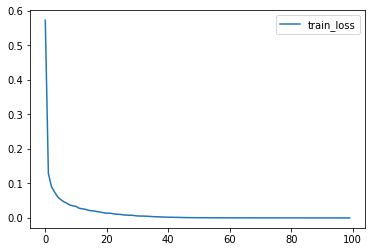

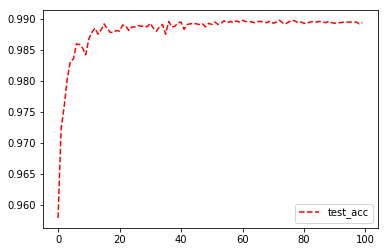

In [8]:
plt.plot(range(n_epochs),train_loss,label='train_loss')
plt.legend()
plt.figure()
plt.plot(range(n_epochs),test_acc,'r--',label='test_acc')
plt.legend()